In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.model_selection import GridSearchCV, PredefinedSplit

from pysim import SIMBoostRegressor, SIMLogitBoostClassifier

**Hyperparameters**

- n_estimators: the maximum number of sim estimators. default=5

- val_ratio: the ratio of validation set for tuning hyperparameters of each sim estimator and early stopping. default=0.2

- early_stop_thres: early stop threshold, the boosting will stop if the validation accuracy does not improve for early_stop_thres times. default=1

- random_state: the random seed. default=0

## Regression

```python
from pysim import SIMBoostRegressor
clf = SIMBoostRegressor(n_estimators=5, val_ratio=0.2, early_stop_thres=1, random_state=0)
## clf.fit(x, y)
```

In [2]:
def data_generator1_reg(random_state=0):
    
    np.random.seed(random_state)
    # data generation
    beta1 = np.array([.2, 0.3, 0.5, 0, 0, 0, 0, 0, 0, 0])
    beta2 = np.array([0, .2, 0.3, 0.5, 0, 0, 0, 0, 0, 0])
    beta3 = np.array([0, 0, 0.2, 0.3, 0.5, 0, 0, 0, 0, 0])
    
    beta = np.vstack([beta1,beta2,beta3])
    model_list = [lambda x: 0.2*np.exp(-4*x), lambda x: 3*x**2, lambda x: 2.5*np.sin(1.5 * np.pi*x)]
    
    x = truncnorm.rvs(a=-3,b=3,loc = 0, scale=1/3, size=(20000,10),random_state=random_state)
    noise = np.random.randn(20000).reshape(-1, 1)
    y = np.reshape(0.2 * np.exp(-4 * np.dot(x, beta1)) + \
                   3 * (np.dot(x, beta2))**2 + 2.5 * np.sin(np.pi * 1.5 * np.dot(x, beta3)), [-1, 1]) + noise
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=random_state)
    return beta, model_list, train_x, test_x, train_y, test_y

In [8]:
beta, model_list, train_x, test_x, train_y, test_y = data_generator1_reg()

clf = SIMBoostRegressor(n_estimators=5)
clf.fit(train_x, train_y)
mean_squared_error(test_y, clf.predict(test_x))

1.0250134693081467

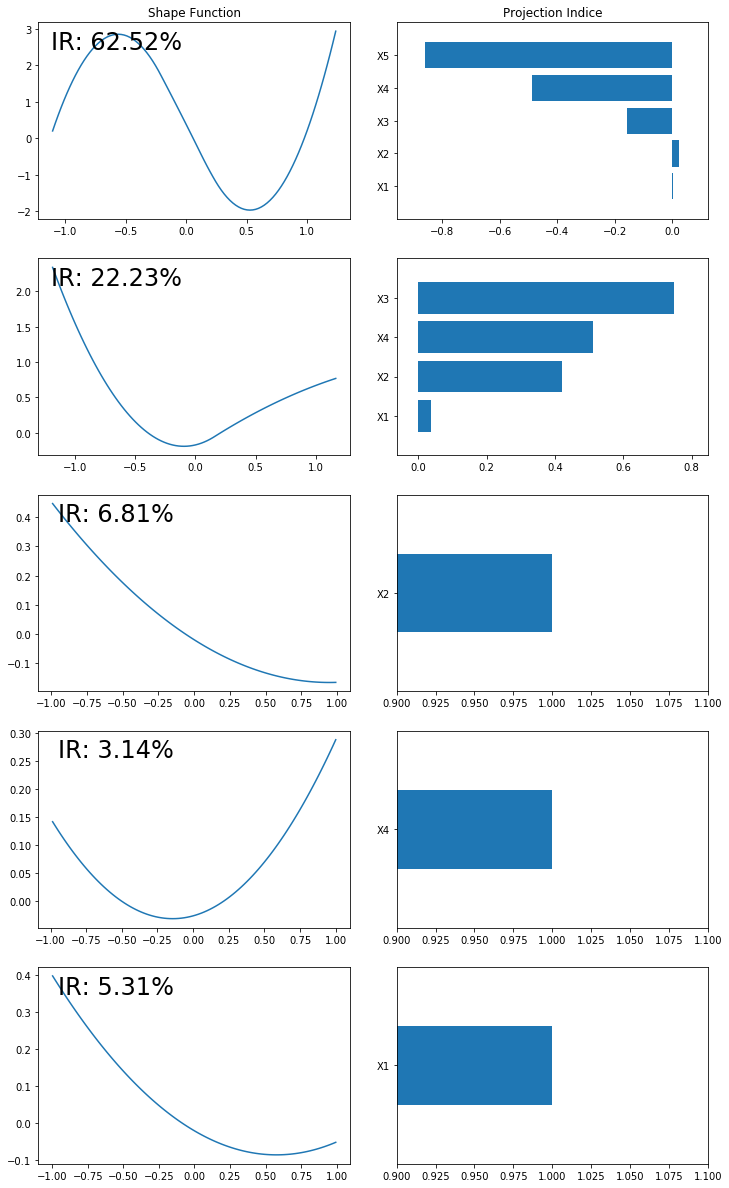

In [9]:
clf.visualize()

## Classification

```python
from pysim import SIMLogitBoostClassifier
clf = SIMLogitBoostClassifier(n_estimators=5, val_ratio=0.2, early_stop_thres=1, random_state=0)
## clf.fit(x, y)
```

In [5]:
def data_generator1_cls(random_state=0):
    
    np.random.seed(random_state)
    # data generation
    beta1 = np.array([.2, 0.3, 0.5, 0, 0, 0, 0, 0, 0, 0])
    beta2 = np.array([0, .2, 0.3, 0.5, 0, 0, 0, 0, 0, 0])
    beta3 = np.array([0, 0, 0.2, 0.3, 0.5, 0, 0, 0, 0, 0])
    
    beta = np.vstack([beta1,beta2,beta3])
    model_list = [lambda x: 0.2*np.exp(-4*x), lambda x: 3*x**2, lambda x: 2.5*np.sin(1.5 * np.pi*x)]
    
    x = truncnorm.rvs(a=-3,b=3,loc = 0, scale=1/3, size=(20000,10),random_state=random_state)
    noise = np.random.randn(20000).reshape(-1, 1)
    y = np.reshape(0.2 * np.exp(-4 * np.dot(x, beta1)) + \
                   3 * (np.dot(x, beta2))**2 + 2.5 * np.sin(np.pi * 1.5 * np.dot(x, beta3)), [-1, 1]) + noise
    y = np.sign(y)
    y = (y + 1) / 2 
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=random_state)
    return beta, model_list, train_x, test_x, train_y, test_y

In [12]:
beta, model_list, train_x, test_x, train_y, test_y = data_generator1_cls()

clf = SIMLogitBoostClassifier(n_estimators=5, early_stop_thres=1)
clf.fit(train_x, train_y)
roc_auc_score(test_y, clf.predict_proba(test_x))

0.9297415812492557

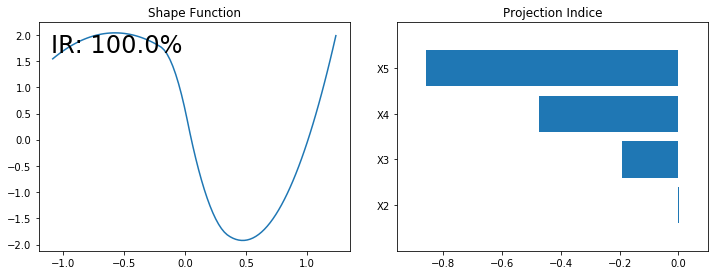

In [13]:
clf.visualize()